Standard imports

In [3]:
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt
from keras.datasets import mnist #import the mnist dataset
import numpy as np

Digit classifier

Download CSV files of the training data

In [4]:
url_train = "https://raw.githubusercontent.com/sknepal/DHDD_CSV/master/train.csv"
download_train = requests.get(url_train).content
train = pd.read_csv(io.StringIO(download_train.decode('utf-8')), header = None)
train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16996,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16997,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16998,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Download CSV files of the testing data

In [5]:
url_test = "https://raw.githubusercontent.com/sknepal/DHDD_CSV/master/test.csv"
download_test = requests.get(url_test).content
test = pd.read_csv(io.StringIO(download_test.decode('utf-8')), header = None)
test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2996,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2998,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Append datasets

In [6]:
train = train.append(test).reset_index()
train

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2995,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19996,2996,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19997,2997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19998,2998,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Define X and y values

In [7]:
y = train.iloc[:,1]
X = train.iloc[::,2:]

Apply feature scaling

In [8]:
X /= 255

Split X for training and validation

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=1)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((18000, 1024), (2000, 1024), (18000,), (2000,))

Define a model

In [10]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(80, ), max_iter=100, alpha=1e-4, solver='sgd', verbose=10, random_state=1, learning_rate_init=.1).fit(X_train, y_train)
print(model.score(X_train, y_train))

Iteration 1, loss = 0.34337474
Iteration 2, loss = 0.10305663
Iteration 3, loss = 0.06532784
Iteration 4, loss = 0.04337603
Iteration 5, loss = 0.03226283
Iteration 6, loss = 0.02140142
Iteration 7, loss = 0.01453958
Iteration 8, loss = 0.01011195
Iteration 9, loss = 0.00785061
Iteration 10, loss = 0.00545605
Iteration 11, loss = 0.00426140
Iteration 12, loss = 0.00351919
Iteration 13, loss = 0.00301145
Iteration 14, loss = 0.00259626
Iteration 15, loss = 0.00235017
Iteration 16, loss = 0.00210451
Iteration 17, loss = 0.00194657
Iteration 18, loss = 0.00178451
Iteration 19, loss = 0.00164635
Iteration 20, loss = 0.00153267
Iteration 21, loss = 0.00142972
Iteration 22, loss = 0.00135671
Iteration 23, loss = 0.00127666
Iteration 24, loss = 0.00121005
Iteration 25, loss = 0.00114645
Iteration 26, loss = 0.00110352
Iteration 27, loss = 0.00104239
Iteration 28, loss = 0.00100023
Iteration 29, loss = 0.00095903
Iteration 30, loss = 0.00092218
Iteration 31, loss = 0.00088845
Iteration 32, los

Perform predictions on the validation set

In [11]:
y_pred = model.predict(X_val)
print(model.score(X_val, y_val))

0.9875


Display predictions in a table

In [12]:
pred=pd.DataFrame({'actual': y_val, 'predicted':y_pred})
pred.reset_index(drop=True, inplace=True)
pred

,actual,predicted
0,3,3
1,8,8
2,2,2
3,5,5
4,5,5
...,...,...
1995,1,1
1996,0,0
1997,8,8
1998,1,1


Generative Adversarial Network

The GAN class (Generator and discriminator)

In [24]:
class GAN:
    def __init__(self, numbers, epochs=100, batch_size=64, input_size_gen=100,
                 hidden_size_gen=128, hidden_size_disc=128, learning_rate=1e-3,
                 decay_rate=1e-4, img_size=28, display_epochs=5):

        self.numbers = numbers #number (list) whose image is to be generated
        self.epochs = epochs #max iterations
        self.learning_rate = learning_rate #learning rate
        self.decay_rate = decay_rate #decay of learning rate
        self.batch_size = batch_size #batch size of data
        self.input_size_gen = input_size_gen #size of the input layer of the generator
        self.hidden_size_gen = hidden_size_gen #size of the hidden layer of the generator
        self.hidden_size_disc = hidden_size_disc #size of the hidden layer of the discriminator
        self.img_size = img_size #28x28 image
        self.display_epochs = display_epochs #display iterations

        #Initialize random values for the generator (weight matrix and bias node)
        self.weight_matrix_gen = np.random.randn(self.input_size_gen, self.hidden_size_gen) * np.sqrt(2. / self.input_size_gen)  
        self.generator_bias_0 = np.zeros((1, self.hidden_size_gen))  
        self.weight_matrix_gen_2 = np.random.randn(self.hidden_size_gen, self.img_size ** 2) * np.sqrt(2. / self.hidden_size_gen)  
        self.generator_bias_1 = np.zeros((1, self.img_size ** 2))  

        #Initialize random values for the discriminator (weight matrix and bias node)
        self.weight_matrix_disc_1 = np.random.randn(self.img_size ** 2, self.hidden_size_disc) * np.sqrt(2. / self.img_size ** 2)  
        self.disc_bias_1 = np.zeros((1, self.hidden_size_disc))  
        self.weight_matrix_disc_2 = np.random.randn(self.hidden_size_disc, 1) * np.sqrt(2. / self.hidden_size_disc) 
        self.disc_bias_2 = np.zeros((1, 1))  
    


    '''
    A bunch of activation functions
    '''
    def grad_tanh(self, x):
        #tanh activation function
        return 1. - np.tanh(x) ** 2

    def lrelu(self, x, alpha=1e-2):
        #Leaky ReLu function (alpha = gradient of the mapping function)
        return np.maximum(x, x * alpha)

    def grad_lrelu(self, x, alpha=1e-2):
        #Derivative of the leaky ReLu function       
        dx = np.ones_like(x)
        dx[x < 0] = alpha
        return dx

    def sigmoid(self, x):
        #Compute the sigmoid of a matrix and return a numpy array
        return 1. / (1. + np.exp(-x))

    def grad_sigmoid(self, x):
        #Return the derivative of the sigmoid for a given input matrix X
        return self.sigmoid(x) * (1. - self.sigmoid(x))

    

    '''
    Show the generated images
    '''
    def show_img(self, images, epoch, state):
        """Generate a grid with sample images from the generator
            images -> generated images (numpy array)
            epoch -> current training iteration
            state -> if True, the grid of images is displayed
        """
        images = np.reshape(images, (self.batch_size, self.img_size, self.img_size))
        fig = plt.figure(figsize=(4, 4))
        for i in range(16):
            plt.subplot(4, 4, i + 1)
            plt.imshow(images[i] * 127.5 + 127.5, cmap='gray')
            plt.axis('off')
        if state == True:
            plt.show()
        else:
            plt.close()



    #Implement forward and backward discriminator and generator
    def fwd_gen(self, rand_noise):
        '''Implement forward prop via the generator
          rand_noise -> random noise
          logit_out_gen -> logit output 
          gen_img -> generated image'''
        self.layer1_gen = np.dot(rand_noise, self.weight_matrix_gen) + self.generator_bias_0
        self.activation_l1_gen = self.lrelu(self.layer1_gen, alpha=0)
        self.logit_out_gen = np.dot(self.activation_l1_gen, self.weight_matrix_gen_2) + self.generator_bias_1
        self.gen_img = np.tanh(self.logit_out_gen)  
        return self.logit_out_gen, self.gen_img

    def fwd_disc(self, img_batch):
        '''Forward prop via the discriminator
          img_batch -> image batch
          logit_out_disc -> logit output
          prediction_fwd -> prediction of nature of images'''
        self.layer1_disc = np.dot(img_batch, self.weight_matrix_disc_1) + self.disc_bias_1
        self.activation_l1_disc = self.lrelu(self.layer1_disc)
        self.logit_out_disc = np.dot(self.activation_l1_disc, self.weight_matrix_disc_2) + self.disc_bias_2
        self.prediction_fwd = self.sigmoid(self.logit_out_disc)  
        return self.logit_out_disc, self.prediction_fwd

    def disc_backprop(self, real_img_batch, logit_real_out, a1_real, x_fake, z1_fake, a1_fake):
        """Implement back prop via the discriminator
            real_img_batch -> real image batch
            logit_real_out -> logit ouput (real images)
            a1_real -> ouput prediction (real images)
            x_fake -> fake generated images
            z1_fake -> logit output (fake images)
            a1_fake -> output prediction (fake images) """
        
        #Sigmoid(real)
        da1_real = -1. / (a1_real + 1e-8) 
        grad_logit_real_out = da1_real * self.grad_sigmoid(logit_real_out)  
        dW1_real = np.dot(self.activation_l1_disc.T, grad_logit_real_out)
        db1_real = np.sum(grad_logit_real_out, axis=0, keepdims=True)

        #ReLu(real)
        da0_real = np.dot(grad_logit_real_out, self.weight_matrix_disc_2.T)
        dz0_real = da0_real * self.grad_lrelu(self.layer1_disc)
        dW0_real = np.dot(real_img_batch.T, dz0_real)
        db0_real = np.sum(dz0_real, axis=0, keepdims=True)

        #Fake input gradients
        da1_fake = 1. / (1. - a1_fake + 1e-8)

        #Sigmoid(fake)
        dz1_fake = da1_fake * self.grad_sigmoid(z1_fake)
        dW1_fake = np.dot(self.activation_l1_disc.T, dz1_fake)
        db1_fake = np.sum(dz1_fake, axis=0, keepdims=True)
         
        #ReLu(fake)
        da0_fake = np.dot(dz1_fake, self.weight_matrix_disc_2.T)
        dz0_fake = da0_fake * self.grad_lrelu(self.layer1_disc, alpha=0)
        dW0_fake = np.dot(x_fake.T, dz0_fake)
        db0_fake = np.sum(dz0_fake, axis=0, keepdims=True)

        #Net gradient (real + fake)
        dW1 = dW1_real + dW1_fake
        db1 = db1_real + db1_fake

        dW0 = dW0_real + dW0_fake
        db0 = db0_real + db0_fake

        #Use stochastic gradient descent to update gradients in each pass
        self.weight_matrix_disc_1 -= self.learning_rate * dW0
        self.disc_bias_1 -= self.learning_rate * db0

        self.weight_matrix_disc_2 -= self.learning_rate * dW1
        self.disc_bias_2 -= self.learning_rate * db1

    def gen_backprop(self, z, x_fake, z1_fake, a1_fake):
        """Implement back prop via the discriminator
            z -> random noise
            x_fake -> generated fake images
            z1_fake -> logit output (discriminator)
            a1_fake -> output prediction (discriminator)"""
  
        #Gradient for the fake inputs
        da1_d = -1.0 / (a1_fake + 1e-8)  

        #Sigmoid gradients
        dz1_d = da1_d * self.grad_sigmoid(z1_fake)
        da0_d = np.dot(dz1_d, self.weight_matrix_disc_2.T)

        #ReLu gradients
        dz0_d = da0_d * self.grad_lrelu(self.layer1_disc)
        dx_d = np.dot(dz0_d, self.weight_matrix_disc_1.T)
        
        #tanh gradients
        grad_z1_gen = dx_d * self.grad_tanh(self.logit_out_gen)
        dW1_g = np.dot(self.activation_l1_gen.T, grad_z1_gen)
        db1_g = np.sum(grad_z1_gen, axis=0, keepdims=True)
        
        #ReLu gradients
        da0_g = np.dot(grad_z1_gen, self.weight_matrix_gen_2.T)
        dz0_g = da0_g * self.grad_lrelu(self.layer1_gen, alpha=0)
        dW0_g = np.dot(z.T, dz0_g)
        db0_g = np.sum(dz0_g, axis=0, keepdims=True)

        #Update the gradients using stochastic gradient descent
        self.weight_matrix_gen -= self.learning_rate * dW0_g
        self.generator_bias_0 -= self.learning_rate * db0_g
        self.weight_matrix_gen_2 -= self.learning_rate * dW1_g
        self.generator_bias_1 -= self.learning_rate * db1_g



    #Process available data
    def process_data(self, training_img, training_labels):
        """Processes the training images and labels:
            training_img -> training images
            training_labels ->  training labels
            final_train_img -> processed training images
            y_train -> processed training labels
            num_batches - number of batches"""
        final_train_img = []
        y_train = []

        #limit the data to digits from 0-9 (since GANs can take hours to train)
        for i in range(training_labels.shape[0]):
            if training_labels[i] in self.numbers:
                final_train_img.append(training_img[i])
                y_train.append(training_labels[i])
        final_train_img = np.array(final_train_img)
        y_train = np.array(y_train)

        #full batches
        num_batches = final_train_img.shape[0] // self.batch_size
        final_train_img = final_train_img[: num_batches * self.batch_size]
        y_train = y_train[: num_batches * self.batch_size]

        # flatten images
        final_train_img = np.reshape(final_train_img, (final_train_img.shape[0], -1))

        # normalise data
        final_train_img = (final_train_img.astype(np.float32) - 127.5) / 127.5

        # shuffle the data for convergence
        rand_img = np.random.permutation(len(final_train_img))
        final_train_img, y_train = final_train_img[rand_img], y_train[rand_img]
        return final_train_img, y_train, num_batches



    #Train the GAN
    def train(self, tr_data, tr_labels):
        """Main method to train the GAN
            tr_data -> training data
            tr_labels -> training labels
            cost_func_disc -> discriminator loss for each pass
            cost_func_gen -> generator loss for each pass 
        """
        cost_func_disc = []  #discriminator loss
        cost_func_gen = []  #generator loss

        #process data
        final_train_img, _, num_batches = self.process_data(tr_data, tr_labels)

        for epoch in range(self.epochs):
            for i in range(num_batches):
                #input batch and noise
                x_real = final_train_img[i * self.batch_size: (i + 1) * self.batch_size]
                z = np.random.normal(0, 1, size=[self.batch_size, self.input_size_gen])  

                #forward prop (generator)
                z1_gen, x_fake = self.fwd_gen(z)
                z1_d_real, a1_d_real = self.fwd_disc(x_real)
                z1_d_fake, a1_d_fake = self.fwd_disc(x_fake)

                # cross entropy loss (a slightly different implentation from Ian Goodfellow's paper)
                disc_cost = np.mean(-np.log(a1_d_real) - np.log(1 - a1_d_fake))
                cost_func_disc.append(disc_cost)
                gen_cost = np.mean(-np.log(a1_d_fake))
                cost_func_gen.append(gen_cost)

                #back prop
                self.disc_backprop(x_real, z1_d_real, a1_d_real,
                                            x_fake, z1_d_fake, a1_d_fake)
                self.gen_backprop(z, x_fake, z1_d_fake, a1_d_fake)

            if epoch % self.display_epochs == 0:
                print(
                    f"Epoch:{epoch:}|G loss:{gen_cost:.4f}|D loss:{disc_cost:.4f}|D(G(z))avg:{np.mean(a1_d_fake):.4f}|D(x)avg:{np.mean(a1_d_real):.4f}|learning_rate:{self.learning_rate:.6f}")
                self.show_img(x_fake, epoch, state=True)  # display sample images
            else:
                self.show_img(x_fake, epoch, state=False)

            # reduce learning rate after every epoch
            self.learning_rate = self.learning_rate * (1.0 / (1.0 + self.decay_rate * epoch))

        return cost_func_disc, cost_func_gen


Check the dimensions of the training vectors

In [25]:
(x_train, y_train), (_, _) = mnist.load_data()

print("y_train.shape",y_train.shape)
print("final_train_img.shape",x_train.shape)

y_train.shape (60000,)
final_train_img.shape (60000, 28, 28)


Do something concrete...

Epoch:0|G loss:0.7965|D loss:1.1845|D(G(z))avg:0.4512|D(x)avg:0.5577|learning_rate:0.001000


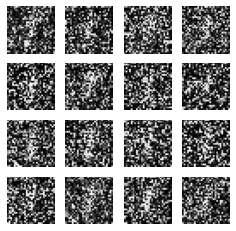

Epoch:5|G loss:0.8104|D loss:1.1611|D(G(z))avg:0.4452|D(x)avg:0.5650|learning_rate:0.000999


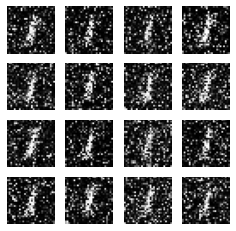

Epoch:10|G loss:0.7421|D loss:1.2922|D(G(z))avg:0.4764|D(x)avg:0.5252|learning_rate:0.000996


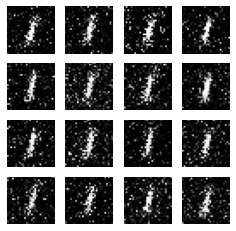

Epoch:15|G loss:0.7106|D loss:1.3511|D(G(z))avg:0.4914|D(x)avg:0.5096|learning_rate:0.000990


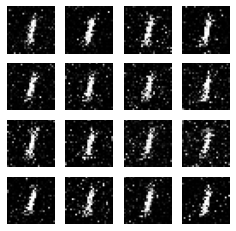

Epoch:20|G loss:0.7014|D loss:1.3751|D(G(z))avg:0.4960|D(x)avg:0.5020|learning_rate:0.000981


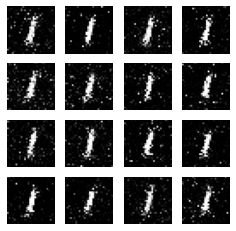

Epoch:25|G loss:0.6894|D loss:1.3936|D(G(z))avg:0.5019|D(x)avg:0.4986|learning_rate:0.000970


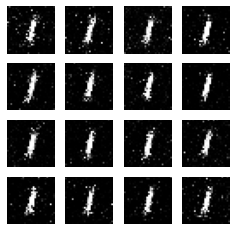

Epoch:30|G loss:0.6927|D loss:1.3899|D(G(z))avg:0.5002|D(x)avg:0.4987|learning_rate:0.000957


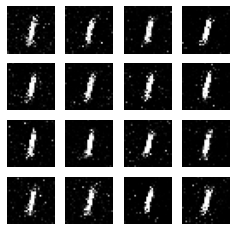

Epoch:35|G loss:0.6994|D loss:1.3774|D(G(z))avg:0.4969|D(x)avg:0.5016|learning_rate:0.000942


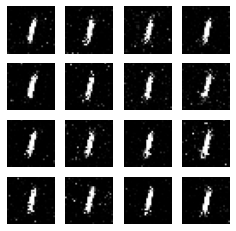

Epoch:40|G loss:0.7122|D loss:1.3531|D(G(z))avg:0.4906|D(x)avg:0.5075|learning_rate:0.000925


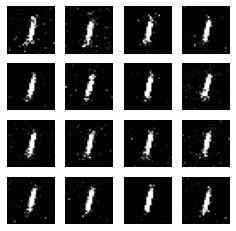

Epoch:45|G loss:0.7311|D loss:1.3195|D(G(z))avg:0.4814|D(x)avg:0.5156|learning_rate:0.000906


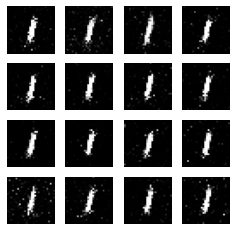

Epoch:50|G loss:0.7392|D loss:1.3026|D(G(z))avg:0.4775|D(x)avg:0.5205|learning_rate:0.000885


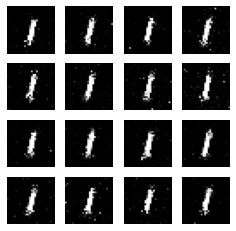

Epoch:55|G loss:0.7349|D loss:1.3117|D(G(z))avg:0.4796|D(x)avg:0.5179|learning_rate:0.000862


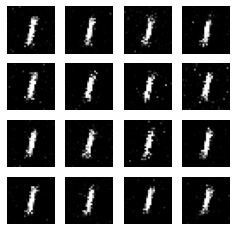

Epoch:60|G loss:0.7171|D loss:1.3456|D(G(z))avg:0.4882|D(x)avg:0.5090|learning_rate:0.000838


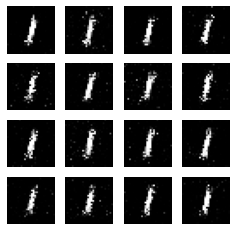

Epoch:65|G loss:0.7093|D loss:1.3601|D(G(z))avg:0.4920|D(x)avg:0.5053|learning_rate:0.000813


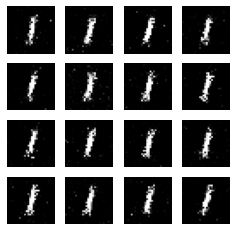

Epoch:70|G loss:0.7084|D loss:1.3602|D(G(z))avg:0.4924|D(x)avg:0.5057|learning_rate:0.000786


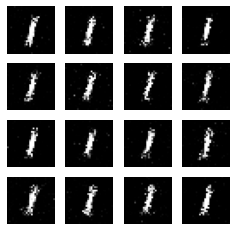

Epoch:75|G loss:0.7097|D loss:1.3586|D(G(z))avg:0.4918|D(x)avg:0.5059|learning_rate:0.000758


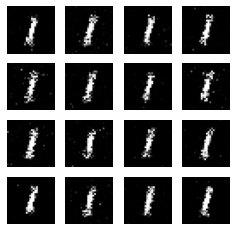

Epoch:80|G loss:0.7080|D loss:1.3611|D(G(z))avg:0.4926|D(x)avg:0.5055|learning_rate:0.000730


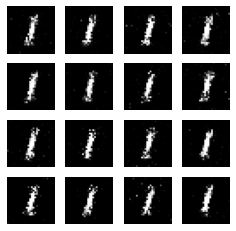

Epoch:85|G loss:0.7077|D loss:1.3620|D(G(z))avg:0.4928|D(x)avg:0.5052|learning_rate:0.000700


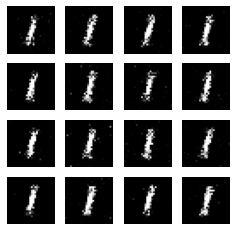

Epoch:90|G loss:0.7081|D loss:1.3613|D(G(z))avg:0.4926|D(x)avg:0.5053|learning_rate:0.000671


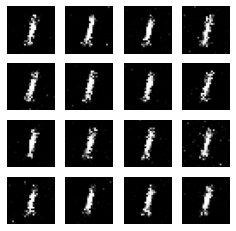

Epoch:95|G loss:0.7070|D loss:1.3632|D(G(z))avg:0.4931|D(x)avg:0.5049|learning_rate:0.000641


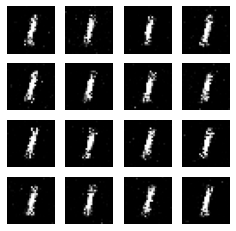

In [27]:
#Since the GAN doesn't use a GPU, it is quite slow and for that reason I pass only one value from the array of predicted val
numbers = [y_pred[1995]] #Feed the predicted value from the devanagri set to the GAN (1 in this case)

model_gan = GAN(numbers, learning_rate=1e-3, decay_rate=1e-4, epochs=100)
cost_func_disc, cost_func_gen = model_gan.train(x_train, y_train)